In [726]:
using PyPlot, LinearAlgebra, Statistics

# 1 dimensional example

In [728]:
# To be explicit, we use realistic physical values

m_e = 0.5109989461 #(electron mass in MeV / c^2)
hbar = 6.6*10^(-16) # hbar in eV * seconds
c = 3*10^18 # speed of light in angstroms per second
prefac = ((hbar*c)^2/(2*m_e*10^6)) # prefactor of free electron dispersion
a = 5;

In [729]:
bzone_boundary = pi/a
kpoints = -bzone_boundary:bzone_boundary/100:bzone_boundary;

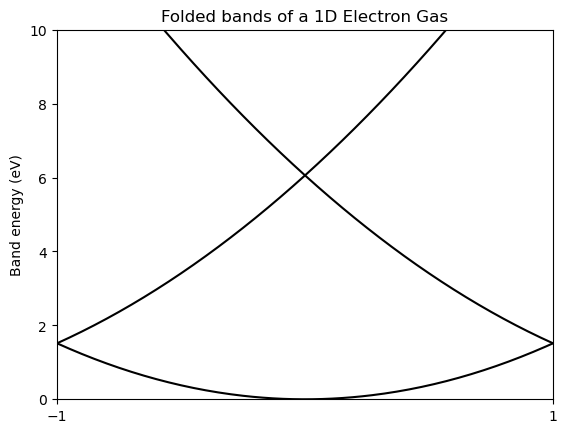

(0.0, 10.0)

In [746]:
for m in -2:2
    band = prefac * (kpoints .+ 2*pi/a * m).^ 2;
    plot(kpoints / bzone_boundary, band, color="black")
end
xlim(-1, 1)
xticks([-1, 1])
#yticks([0, 2])
title("Folded bands of a 1D Electron Gas")
ylabel("Band energy (eV)");
#gca().set_aspect("equal")
ylim(0, 10)

In [747]:
# Now we put in an interaction V_(-1)

In [748]:
function Hamiltonian(k::Float64, n::Integer, VGs::Vector{Float64})
    grange = collect(-n:n)
    diagonal_components = prefac * (k  .+ 2pi*grange/a).^2 # Free electron components
    H = diagm(diagonal_components)
    for (gidx, vg) in enumerate(VGs)
        for i in 1:(2n+1-gidx)
            H[i, i+gidx] = vg#prefac * (bzone_boundary)^2
        end
        for i in (gidx+1):2n+1
            H[i, i-gidx] = vg 
        end
    end
    return H
end;

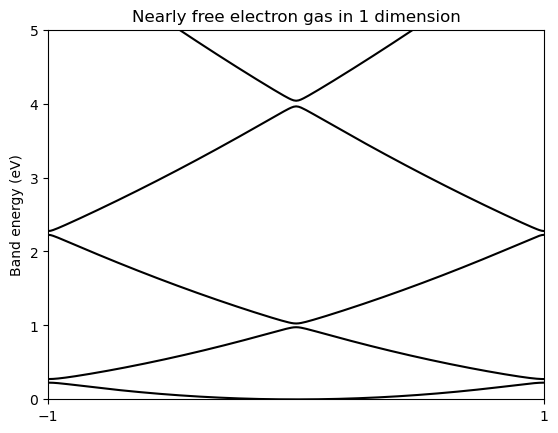

(0.0, 5.0)

In [749]:
n = 2
e_ks = zeros(length(kpoints), n * 2 + 1)
VGs = prefac * (bzone_boundary)^2 * [0.1, 0.1, 0.1, 0.15]
for (k_idx, kpoint) in enumerate(kpoints)
    e_ks[k_idx, :] = eigvals(Hamiltonian(kpoint, n, VGs))
end
plot(kpoints/bzone_boundary, e_ks/(prefac * (2pi/a)^2), color="black")
xlim(-1, 1)
xticks([-1, 1])
#yticks([0, 2])
ylabel("Band energy (eV)");
title("Nearly free electron gas in 1 dimension")
#gca().set_aspect("equal")
ylim(0, 5)

# Now we move on to two dimensions

# Without interactions first

In [752]:
bzone_boundary = pi/a
kpoints = -bzone_boundary:bzone_boundary/20:bzone_boundary;

In [753]:
n = m = 2
kxs = zeros(length(kpoints), length(kpoints))
kys = zeros(length(kpoints), length(kpoints))
eks = zeros(length(kpoints), length(kpoints), (2n+1) * (2m+1))
for (kx_idx, kx) in enumerate(kpoints)
    for (ky_idx, ky) in enumerate(kpoints)
        kxs[kx_idx, ky_idx] = kx
        kys[kx_idx, ky_idx] = ky
        idx = 1
        for i in -n:n
            for j in -m:m
                ek = prefac * ((kx+2pi*i/a)^2+(ky+2pi*j/a)^2)
                eks[kx_idx, ky_idx, idx] = ek
                idx += 1
            end
        end
    end
end

In [755]:
numbands = size(eks)[3]
n_electrons = 1
fermi_energy = quantile(vec(eks), n_electrons/(2*numbands));

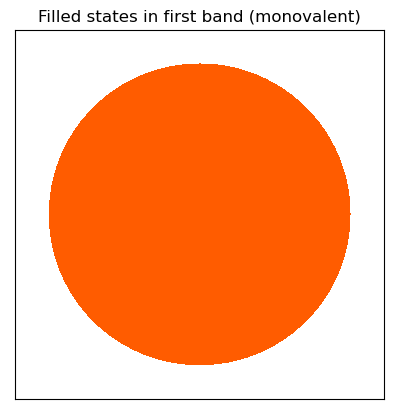

In [761]:
contourf(kxs/(pi/a), kys/(pi/a), sort(eks, dims=3)[:, :, 1], [0, fermi_energy], cmap="hot")
gca().set_aspect("equal")
xticks([])
yticks([])
title("Filled states in first band (monovalent)");

In [762]:
n_electrons = 2
fermi_energy = quantile(vec(eks), n_electrons/(2*numbands)); 

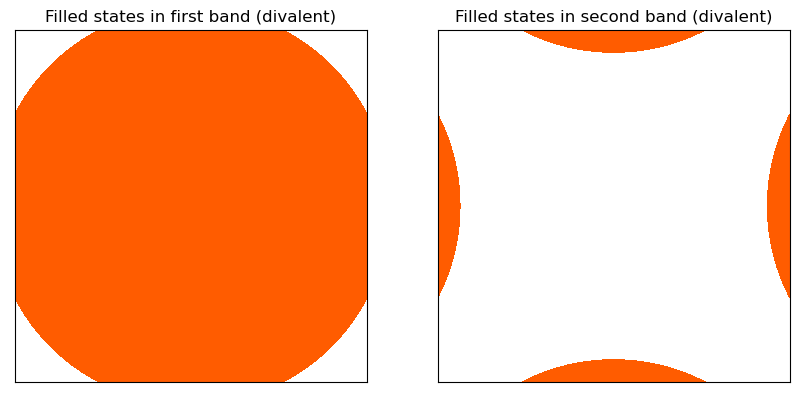

In [766]:
figure(figsize=(10, 5))
subplot(1, 2, 1)
contourf(kxs/(pi/a), kys/(pi/a), sort(eks, dims=3)[:, :, 1], [0, fermi_energy], cmap="hot")
gca().set_aspect("equal")
xticks([])
yticks([])
title("Filled states in first band (divalent)");
subplot(1, 2, 2)
contourf(kxs/(pi/a), kys/(pi/a), sort(eks, dims=3)[:, :, 2], [0, fermi_energy], cmap="hot")
gca().set_aspect("equal")
xticks([])
yticks([])
title("Filled states in second band (divalent)");

In [514]:
# Now we do a cut of the disperision along X-gamma-M-X-gamma

In [849]:
ks_cut = Vector{Float64}[]
N = 50
for i in 1:N
    push!(ks_cut, [0.5, 0] - [0.5, 0] * (i-1)/N)
end
for i in 1:N
    push!(ks_cut, [0, 0] + [0.5, 0.5] * (i-1)/N)
end
for i in 1:N
    push!(ks_cut, [0.5, 0.5] - [0, 0.5] * (i-1)/N)
end
for i in 1:N+1
    push!(ks_cut, [0.5, 0] - [0.5, 0] * (i-1)/N)
end

In [850]:
n = m = 1
eks = zeros(length(ks_cut), (2n+1) * (2m+1))
for (k_idx, k) in enumerate(ks_cut)
    idx = 1
    for i in -n:n
        for j in -m:m
            kx, ky = k * 2pi/a
            ek = prefac * ((kx+2pi*i/a)^2+(ky+2pi*j/a)^2)
            eks[k_idx, idx] = ek
            idx += 1
        end
    end
end

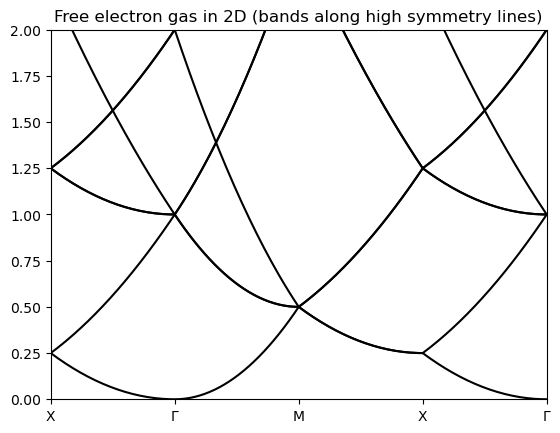

PyObject Text(0.5, 1.0, 'Free electron gas in 2D (bands along high symmetry lines)')

In [852]:
plot(1:4N+1, eks/(prefac*(2pi/a)^2), color="black")
xticks([1, N+1, 2N+1, 3N+1, 4N+1], ["X", "Γ", "M", "X", "Γ"])
ylim(0, 2)
xlim(1, 4N+1)
title("Free electron gas in 2D (bands along high symmetry lines)")

In [853]:
# Now we put in interactions
# We have now a (2n+1)*(2m+1) by (2n+1)*(2m+1) Hamiltonian matrix

In [854]:
function Hamiltonian(kx::Float64, ky::Float64, n::Integer, VGs::Matrix{Float64})
    grange = collect(-n:n)
    diagonal_components  = zeros((2n+1)^2)
    idx = 1
    gs = Vector{Vector{Float64}}()
    for i in -n:n
        for j in -n:n
            diagonal_components[idx] = prefac * (kx  .+ 2pi*i/a).^2 + prefac * (ky  .+ 2pi*j/a).^2
            push!(gs, [i, j])
            idx += 1
        end
    end
    H = diagm(diagonal_components)
    g1max, g2max = size(VGs)
    for i in 1:length(diagonal_components)
        row_g = gs[i]
        for g1 in 1:g1max
            for g2 in 1:g2max
                VG = VGs[g1, g2]
                (g1 == 1 && g2 == 1) && continue
                column_g = row_g + [g1-1, g2-1]
                j = findfirst(x->x==column_g, gs)
                !isnothing(j) && (H[i, j] = VG)
                column_g = row_g - [g1-1, g2-1]
                j = findfirst(x->x==column_g, gs)
                !isnothing(j) && (H[i, j] = VG)
            end
        end
    end
    return H
end;

In [856]:
V1, V2, V3 = 0.2, 0.1, 0.1 
VGs =  prefac * (bzone_boundary)^2 * [0 V1 V2; V1 V3 0; V2 0 0];

In [857]:
n = m = 2
eks_interacting = zeros(length(ks_cut), (2n+1) * (2m+1))
for (k_idx, k) in enumerate(ks_cut)
    kx, ky = k * 2pi/a
    eks_interacting[k_idx, :] = eigvals(Hamiltonian(kx, ky, n, VGs))
end

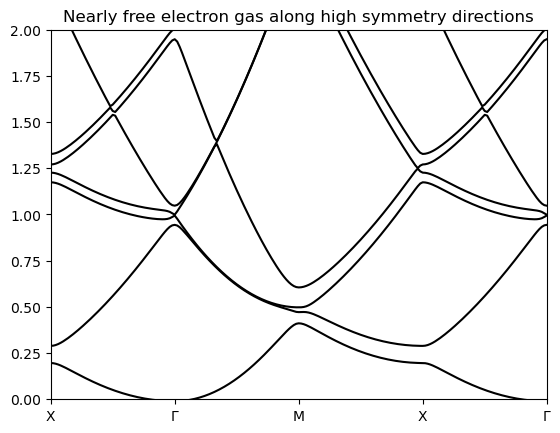

PyObject Text(0.5, 1.0, 'Nearly free electron gas along high symmetry directions')

In [859]:
plot(1:4N+1, eks_interacting/(prefac*(2pi/a)^2), color="black")
xticks([1, N+1, 2N+1, 3N+1, 4N+1], ["X", "Γ", "M", "X", "Γ"])
ylim(0, 2)
xlim(1, 4N+1)
title("Nearly free electron gas along high symmetry directions")

In [860]:
ks_cut_gamma_x = Vector{Float64}[]
N = 100
X = [0, 0.5]
for i in 1:N
    push!(ks_cut_gamma_x, [0, 0] + X * (i-1)/N)
end
for i in 1:N+1
    push!(ks_cut_gamma_x, X - X * (i-1)/N)
end
n = m = 1
eks_interacting_gamma_x = zeros(length(ks_cut_gamma_x), (2n+1) * (2m+1))
for (k_idx, k) in enumerate(ks_cut_gamma_x)
    kx, ky = k * 2pi/a
    eks_interacting_gamma_x[k_idx, :] = eigvals(Hamiltonian(kx, ky, n, VGs))
end

# A cut across the Bragg plane
# (see how the group velocity across the Bragg plane goes to zero) 

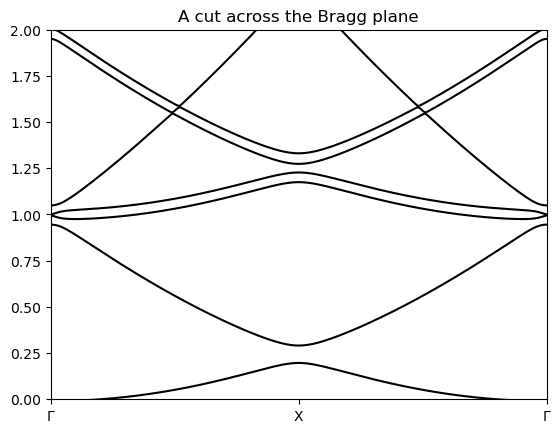

PyObject Text(0.5, 1.0, 'A cut across the Bragg plane')

In [865]:
plot(1:2N+1, sort(eks_interacting_gamma_x, dims=2)/(prefac*(2pi/a)^2), color="black")
xticks([1, N+1, 2N+1], ["Γ", "X", "Γ"])
ylim(0, 2)
xlim(1, 2N+1)
title("A cut across the Bragg plane")

In [866]:
bzone_boundary = pi/a
kpoints = -bzone_boundary:bzone_boundary/40:bzone_boundary;
n = 2
kxs = zeros(length(kpoints), length(kpoints))
kys = zeros(length(kpoints), length(kpoints))
eks = zeros(length(kpoints), length(kpoints), (2n+1) * (2n+1))
for (kx_idx, kx) in enumerate(kpoints)
    for (ky_idx, ky) in enumerate(kpoints)
        kxs[kx_idx, ky_idx] = kx
        kys[kx_idx, ky_idx] = ky
        eks[kx_idx, ky_idx, :] = eigvals(Hamiltonian(kx, ky, n, VGs))
    end
end

In [867]:
numbands = size(eks)[3]
n_electrons = 2
fermi_energy = quantile(vec(eks), n_electrons/(2*numbands));

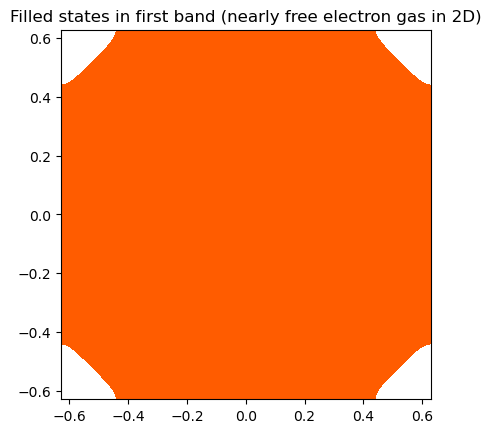

PyObject Text(0.5, 1.0, 'Filled states in first band (nearly free electron gas in 2D)')

In [872]:
contourf(kxs, kys, sort(eks, dims=3)[:, :, 1], [-10, fermi_energy], cmap="hot")
gca().set_aspect("equal")
title("Filled states in first band (nearly free electron gas in 2D)")
#xlim(-0.6, -0.4)
#ylim(-0.6, -0.4)

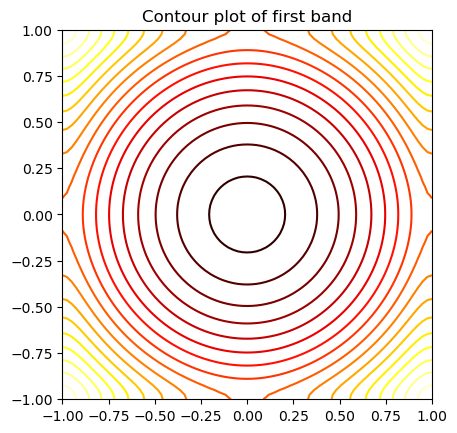

PyObject Text(0.5, 1.0, 'Contour plot of first band')

In [870]:
contour(kxs / bzone_boundary, kys/ bzone_boundary, sort(eks, dims=3)[:, :, 1], 20, cmap="hot")
gca().set_aspect("equal")
#xlim(-1, -0.8)
#ylim(0, 0.5)
title("Contour plot of first band")